In [20]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

from itertools import combinations

# cambiará el esquema de colores predeterminado de Seaborn a uno más oscuro, adecuado para gráficas con fondos claros. 
sns.set_theme(style="dark")

# establece el estilo en Solarize_Lihgt2. 
plt.style.use('Solarize_Light2')


In [3]:
df = pd.read_csv("archivo_casi_listo.csv",index_col = 0)

1. Calcula las siguientes estadísticas descriptivas para las variables numéricas:
- Media
- Mediana
- Desviación estándar
- Mínimo
- Máximo

In [4]:
numericas = df.select_dtypes(include="number").columns
numericas

Index(['density', 'agriculturalland', 'landarea', 'armedforcessize',
       'birthrate', 'callingcode', 'co2-emissions', 'cpi', 'cpichange',
       'fertilityrate', 'forestedarea', 'gasolineprice', 'gdp',
       'grossprimaryeducationenrollment', 'grosstertiaryeducationenrollment',
       'infantmortality', 'lifeexpectancy', 'maternalmortalityratio',
       'minimumwage', 'outofpockethealthexpenditure', 'physiciansperthousand',
       'population', 'populationlaborforceparticipation', 'taxrevenue',
       'totaltaxrate', 'unemploymentrate', 'urban_population', 'latitud',
       'longitud'],
      dtype='object')

In [5]:
numericas_lista = ['density', 'agriculturalland', 'landarea', 'armedforcessize',
       'birthrate', 'callingcode', 'co2-emissions', 'cpi', 'cpichange',
       'fertilityrate', 'forestedarea', 'gasolineprice', 'gdp',
       'grossprimaryeducationenrollment', 'grosstertiaryeducationenrollment',
       'infantmortality', 'lifeexpectancy', 'maternalmortalityratio',
       'minimumwage', 'outofpockethealthexpenditure', 'physiciansperthousand',
       'population', 'populationlaborforceparticipation', 'taxrevenue',
       'totaltaxrate', 'unemploymentrate', 'urban_population', 'latitud',
       'longitud']

for columna in numericas_lista:
    media = df[columna].mean ()
    mediana = df[columna].median ()
    desviacion = df[columna].std ()
    minimo = df[columna].min ()
    maximo = df[columna].max ()
    print (columna.upper())
    print (f"La media es {np.round(media,2)}; la mediana {np.round(mediana,2)}; la desviación {np.round(desviacion,2)}; mínimo {np.round(minimo,2)}, maximo {np.round(maximo,2)} ")
    print (".......")

DENSITY
La media es 356.76; la mediana 89.0; la desviación 1982.89; mínimo 2.0, maximo 26337.0 
.......
AGRICULTURALLAND
La media es 39.13; la mediana 39.6; la desviación 21.39; mínimo 0.6, maximo 82.6 
.......
LANDAREA
La media es 689624.37; la mediana 119511.0; la desviación 1921609.23; mínimo 0.0, maximo 17098240.0 
.......
ARMEDFORCESSIZE
La media es 159274.85; la mediana 31000.0; la desviación 380628.8; mínimo 0.0, maximo 3031000.0 
.......
BIRTHRATE
La media es 20.15; la mediana 17.95; la desviación 9.8; mínimo 5.9, maximo 46.08 
.......
CALLINGCODE
La media es 360.01; la mediana 255.5; la desviación 322.49; mínimo 1.0, maximo 1876.0 
.......
CO2-EMISSIONS
La media es 177799.24; la mediana 12303.0; la desviación 838790.27; mínimo 11.0, maximo 9893038.0 
.......
CPI
La media es 190.46; la mediana 125.34; la desviación 397.95; mínimo 99.03, maximo 4583.71 
.......
CPICHANGE
La media es 6.72; la mediana 2.3; la desviación 24.45; mínimo -4.3, maximo 254.9 
.......
FERTILITYRATE
La me

2. Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos

In [6]:
df.sort_values("density").head(1)

,country,density,abbreviation,agriculturalland,landarea,armedforcessize,birthrate,callingcode,capital/majorcity,co2-emissions,cpi,cpichange,currency-code,fertilityrate,forestedarea,gasolineprice,gdp,grossprimaryeducationenrollment,grosstertiaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,maternalmortalityratio,minimumwage,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate,urban_population,latitud,longitud,continent
114,Mongolia,2.0,MN,71.5,1564116.0,18000.0,24.13,976.0,Ulaanbaatar,25368.0,195.76,7.3,MNT,2.9,8.0,0.72,1.385285e+10,104.0,65.6,14.0,Ulaanbaatar,69.7,45.0,0.65,Mongolian,39.3,2.86,3225167.0,59.7,16.8,25.7,6.01,2210626.0,46.862496,103.846656,Asia


In [7]:
df.sort_values("density").tail(1)

,country,density,abbreviation,agriculturalland,landarea,armedforcessize,birthrate,callingcode,capital/majorcity,co2-emissions,cpi,cpichange,currency-code,fertilityrate,forestedarea,gasolineprice,gdp,grossprimaryeducationenrollment,grosstertiaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,maternalmortalityratio,minimumwage,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate,urban_population,latitud,longitud,continent
113,Monaco,26337.0,MC,39.6,2.0,NaN,5.9,377.0,Monaco City,NaN,NaN,NaN,EUR,2.245,32.0,2.0,7.184844e+09,NaN,31.2,2.6,Monaco City,73.2,NaN,11.72,French,6.1,6.56,38964.0,62.45,16.3,NaN,NaN,38964.0,43.738418,7.424616,Europe


3. Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos

In [8]:
df["birthrate"].mean()

20.145282051282045

4. Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil

In [10]:
percentiles = np.nanpercentile(df["infantmortality"], [0,25, 75,100]) #Calculamos los percentiles de mortalidad infantil

In [92]:
#df["infantmortality"].describe() #Otra forma de ver los percentiles sería con el describe

In [11]:
#Definimos una función para deterinar los rangos
def mortalidad(numero):
    if numero == np.nan:
        return "unknown"
    elif numero < percentiles[1]:
        return "baja"
    elif numero > percentiles[2]:
        return "alta"
    else:
        return "moderada"

In [12]:
#Creamos una columna nueva, en base a los rangos definidos en la función de arriba
df["infantmortality_new"] = df["infantmortality"].apply(mortalidad)

In [13]:
df.head()

,country,density,abbreviation,agriculturalland,landarea,armedforcessize,birthrate,callingcode,capital/majorcity,co2-emissions,cpi,cpichange,currency-code,fertilityrate,forestedarea,gasolineprice,gdp,grossprimaryeducationenrollment,grosstertiaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,maternalmortalityratio,minimumwage,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate,urban_population,latitud,longitud,continent,infantmortality_new
0,Afghanistan,60.0,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,38041754.0,48.90,9.3,71.4,11.12,9797273.0,33.939110,67.709953,Asia,alta
1,Albania,105.0,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,2854191.0,55.70,18.6,36.6,12.33,1747593.0,41.153332,20.168331,Europe,moderada
2,Algeria,18.0,DZ,17.4,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,43053054.0,41.20,37.2,66.1,11.70,31510100.0,28.033886,1.659626,Africa,moderada
3,Andorra,164.0,AD,40.0,468.0,NaN,7.20,376.0,Andorra la Vella,469.0,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,31.2,2.7,Andorra la Vella,73.2,NaN,6.63,Catalan,36.4,3.33,77142.0,62.45,16.3,NaN,NaN,67873.0,42.506285,1.521801,Europe,baja
4,Angola,26.0,AO,47.5,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,31825295.0,77.50,9.2,49.1,6.89,21061025.0,-11.202692,17.873887,Africa,alta


5. Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación

In [14]:
df_correlacion = df[["fertilityrate", "lifeexpectancy"]].corr(method="spearman")
df_correlacion

,fertilityrate,lifeexpectancy
fertilityrate,1.00000,-0.83538
lifeexpectancy,-0.83538,1.00000


In [ ]:
#Existe una correlación negativa entre la tasa de fertilidad y la esperanza de vida: Cuando la tasa de fertilidad en un país es mayor, su esperanza de vida es menor

6. Visualiza la distribución de la variable "cpi" utilizando un histograma y comenta sobre la distribución de los índices de percepción de corrupción

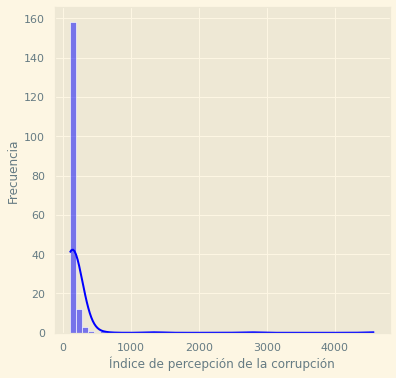

In [34]:
plt.figure(figsize=(6, 6))

sns.histplot(data=df, x="cpi", bins = 50, kde=True, color='blue')

plt.xlabel("Índice de percepción de la corrupción")
plt.ylabel("Frecuencia");

In [ ]:
#La inmensa mayoría de los países tienen un índice de percepción de la corrupción menor de 300 

7. Encuentra el país con la mayor diferencia entre el "gdp" (Producto Interno Bruto) y el "co2-emissions" (emisiones de dióxido de carbono)

In [45]:
df["diferencia"] = df["gdp"] - df["co2-emissions"]

In [46]:
df.sort_values("diferencia",ascending=False).head(1)

,country,density,abbreviation,agriculturalland,landarea,armedforcessize,birthrate,callingcode,capital/majorcity,co2-emissions,cpi,cpichange,currency-code,fertilityrate,forestedarea,gasolineprice,gdp,grossprimaryeducationenrollment,grosstertiaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,maternalmortalityratio,minimumwage,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate,urban_population,latitud,longitud,continent,infantmortality_new,diferencia
186,United States,36.0,US,44.4,9833517.0,1359000.0,11.6,1.0,"Washington, D.C.",5006302.0,117.24,7.5,USD,1.73,33.9,0.71,2.142770e+13,101.8,88.2,5.6,New York City,78.5,19.0,7.25,Unknown,11.1,2.61,328239523.0,62.0,9.6,36.6,14.7,270663028.0,37.09024,-95.712891,North America,baja,2.142769e+13


8. Calcula el porcentaje promedio de personas que participan en la fuerza laboral(population_labor_force_participation) para todos los países

9. Genera un mapa de calor (heatmap) de la matriz de correlación de todas las variables numéricas y discute las relaciones más destacadas